### Importing Packages

In [1]:
from model import GeneratorGAN, DiscriminatorGAN
from train import trainDiscriminator, trainGenerator, trainProcess, trainResults
from test import testResults, testPlotting
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import TensorDataset
import torchvision.utils as vutils
from torchvision import transforms
import torchvision.datasets as dset

### Initializing GPU

In [2]:
print(f'CUDA available: {torch.cuda.is_available()}')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

CUDA available: True


In [3]:
# resize dataset to 64 x 64 images and tensorize
dataset = dset.ImageFolder(root='mosque_dataset',
                           transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                           ]))


# train-test split
train_size = int(.7 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size] )

# defining data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=True, num_workers=2, drop_last = True)

### Displaying Real Images

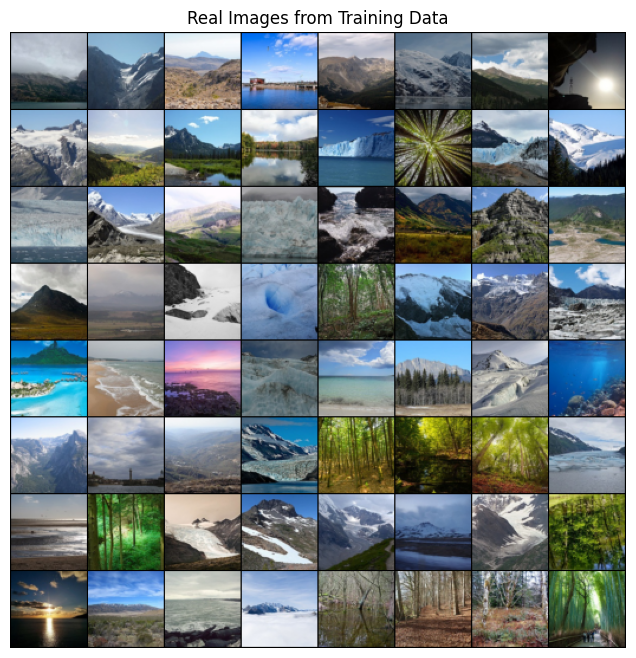

In [11]:
for i, (images, _) in enumerate(train_loader):
    images = images.to(device)[:64] # get only half of the 128 images
    break
plt.figure(figsize = (8, 8))
plt.title("Real Images from Training Data")
plt.axis('off')
plt.imshow(np.transpose(vutils.make_grid(images, padding= True).cpu(), (1, 2, 0))) # rearrange to height, width, channels

### Weight Initialization

In [5]:
def w_init(m):
    if isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Conv2d):
        nn.init.normal_(m.weight.data, 0, .02) # 0 mean 0.02 stdev
    if isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight.data, 1, .02) # 1 mean .02 stdev
        nn.init.constant_(m.bias.data, 0) #some constant for bn

### Initializing and Debugging Generator Model

In [6]:
G = GeneratorGAN(kernSize = 5, padVal = 2)
G = G.to(device)   
G.apply(w_init)

# testing random vector to ensure correct output
fixed_noise = torch.rand(128, 100, 1, 1) 
fixed_noise = fixed_noise.to(device)
with torch.no_grad():
    output = G(fixed_noise)
output.shape

torch.Size([128, 3, 64, 64])

### Initializing and Debugging Discriminator Model

In [7]:
D = DiscriminatorGAN(kernSize = 5, padVal = 2)
D = D.to(device)
D.apply(w_init)
# testing random image to ensure correct output
sample_image = dataset[0][0]
sample_image = sample_image.unsqueeze(0)
sample_image = sample_image.to(device)
with torch.no_grad():
    output = D(sample_image)
output.shape

torch.Size([1, 1, 1, 1])

### Optimizing Number of Epochs

In [ ]:
num_epochs = [10, 50, 100, 200, 300]
lr = .0002

# the parameters below reset every time to ensure a new model is being trained after every iteration
for epoch_num in num_epochs:
    dLoss = []
    gLoss = []
    G = GeneratorGAN(kernSize = 5, padVal = 2)
    G = G.to(device)   
    G.apply(w_init)
    D = DiscriminatorGAN(kernSize = 5, padVal = 2)
    D = D.to(device)
    D.apply(w_init)
    optimD = optim.Adam(D.parameters(), lr = lr, betas = (0.5, .999))
    optimG = optim.Adam(G.parameters(), lr = lr, betas = (0.5, .999))       

    trainProcess(epoch_num, train_loader, D, G, optimD, optimG, dLoss, gLoss, lr, 5, 2, device)
    trainResults(epoch_num, G, dLoss, gLoss, device)

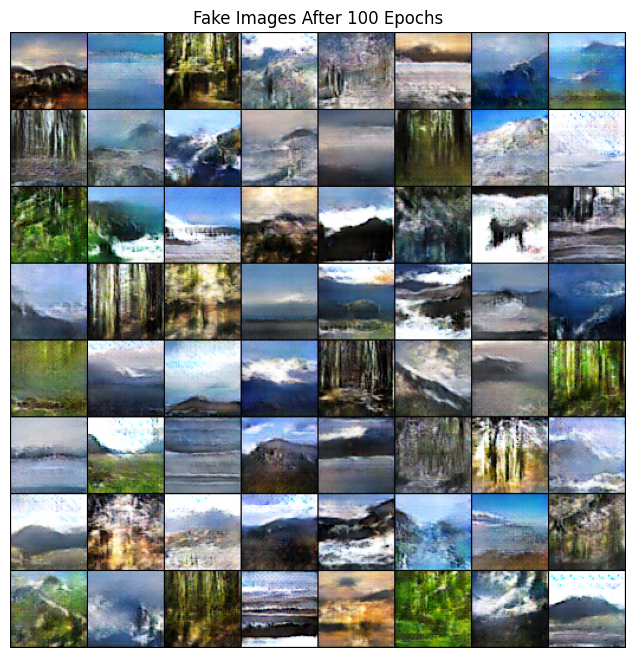 <br>
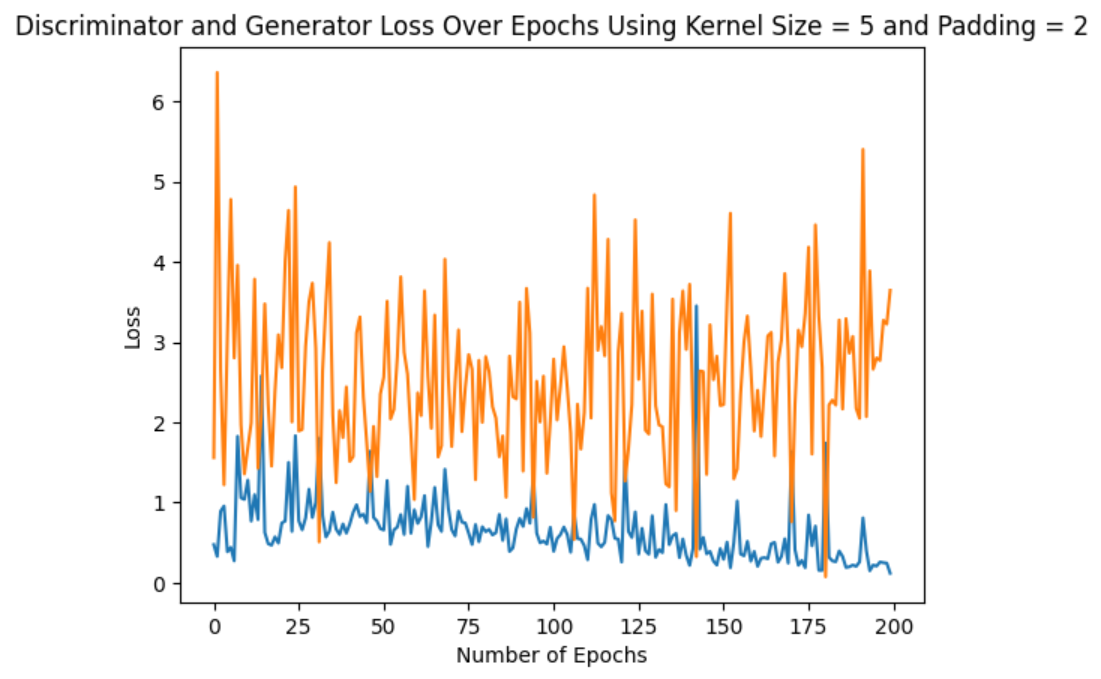 <br>
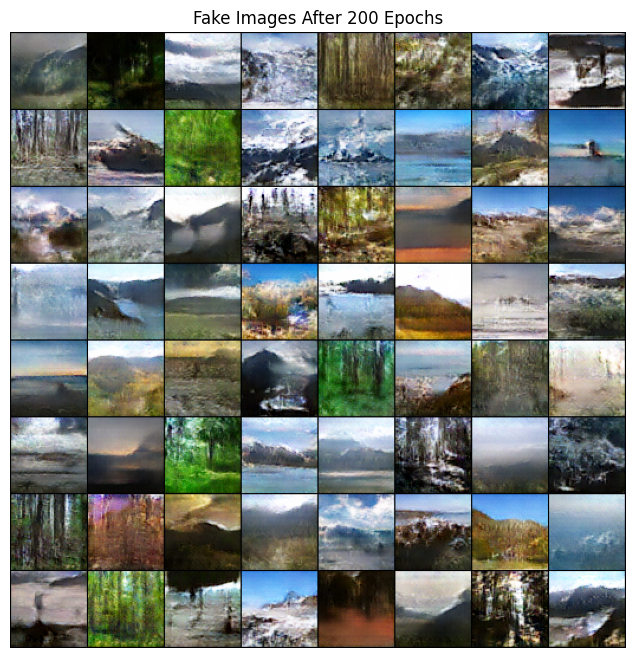 <br>
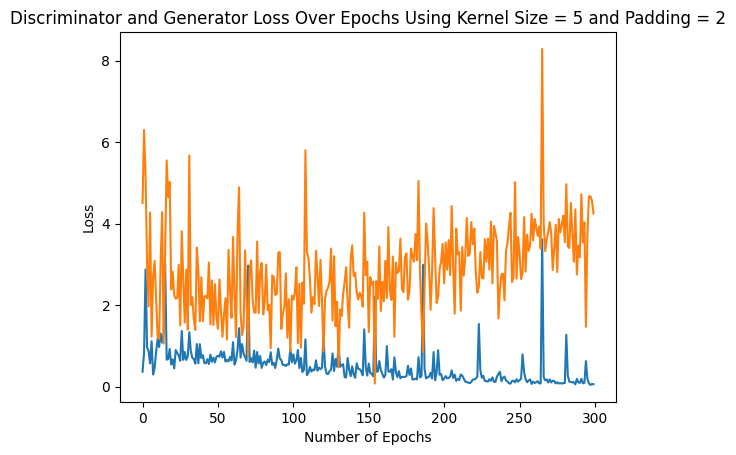 <br>
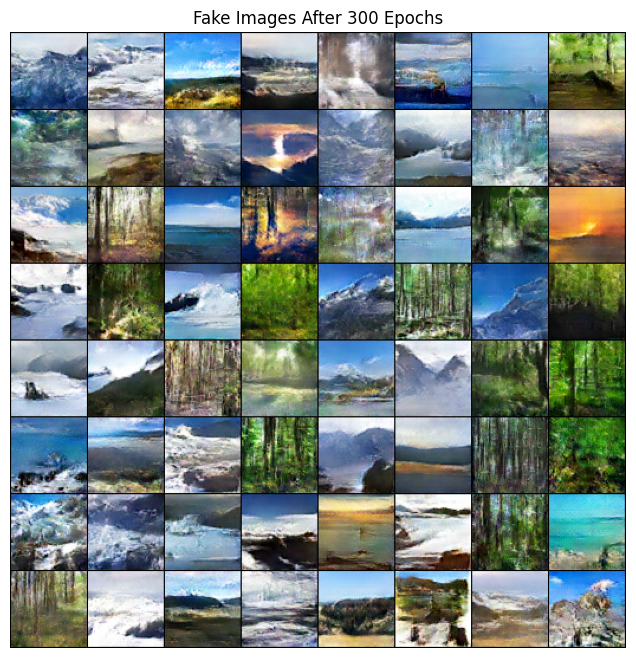 <br>

### Optimizing Learning Rate

In [ ]:
epoch_num = 100
learning_rates = [.00009, .0006, .0009]
# the parameters below reset every time to ensure a new model is being trained after every iteration

for lr in learning_rates:
    dLoss = []
    gLoss = []
    G = GeneratorGAN(kernSize = 5, padVal = 2)
    G = G.to(device)   
    G.apply(w_init)
    D = DiscriminatorGAN(kernSize = 5, padVal = 2)
    D = D.to(device)
    D.apply(w_init)
    optimD = optim.Adam(D.parameters(), lr = lr, betas = (0.5, .999))
    optimG = optim.Adam(G.parameters(), lr = lr, betas = (0.5, .999))       
    trainProcess(epoch_num, train_loader, D, G, optimD, optimG, dLoss, gLoss, device)
    trainResults(epoch_num, G, dLoss, gLoss, device)

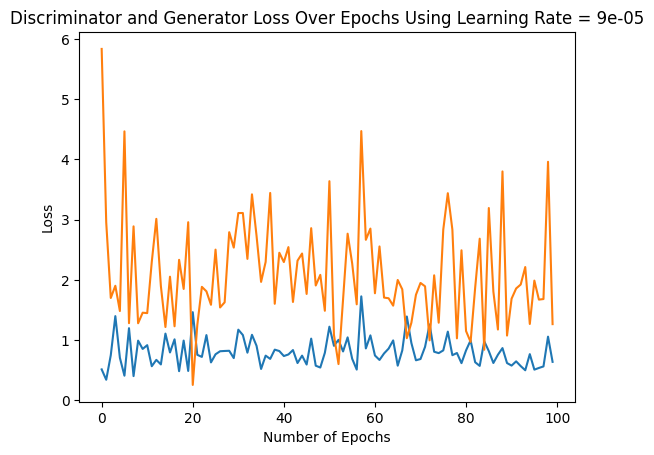 <br>
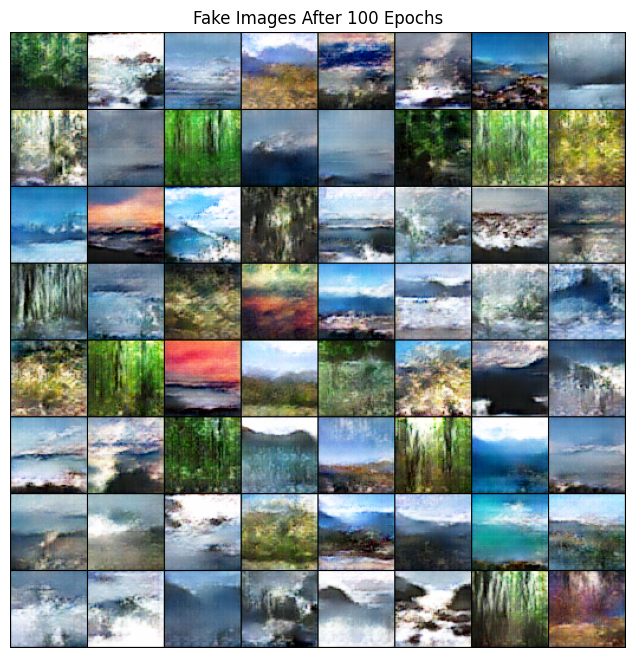

### Trying a Smaller Kernel Size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After 100 epochs with kernel size = 3 and padding = 1: 	Discriminator Loss: 0.695588231086731	 Generator Loss: 3.3637771606445312



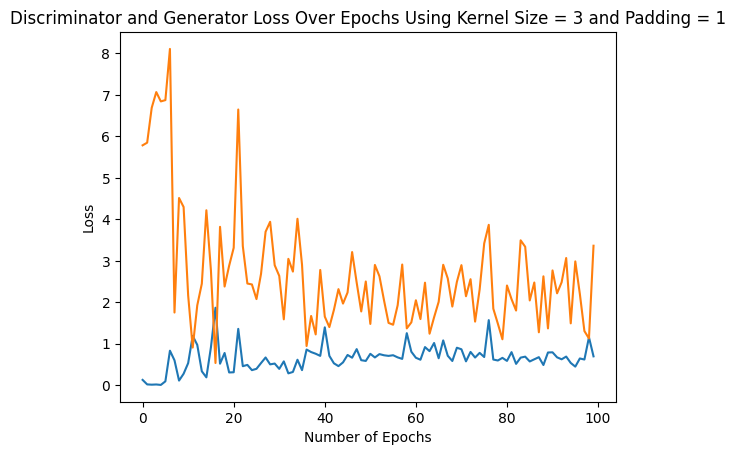

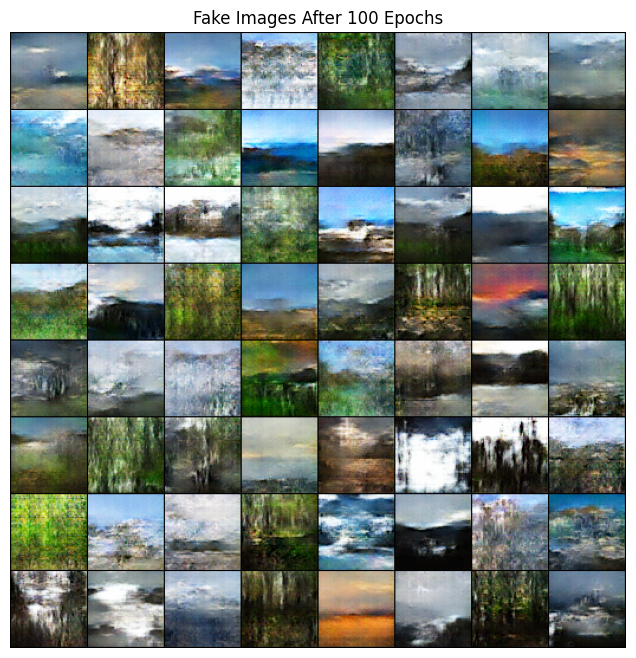

In [12]:
epoch_num = 100
lr = .00009
batch_size = 128
dLoss = []
gLoss = []
G = GeneratorGAN(kernSize = 3, padVal = 1)
G = G.to(device)   
G.apply(w_init)
D = DiscriminatorGAN(kernSize = 3, padVal = 1)
D = D.to(device)
D.apply(w_init)
optimD = optim.Adam(D.parameters(), lr = lr, betas = (0.5, .999))
optimG = optim.Adam(G.parameters(), lr = lr, betas = (0.5, .999))   

trainProcess(epoch_num, train_loader, D, G, optimD, optimG, dLoss, gLoss, lr, 3, 1, device)
trainResults(epoch_num, G, dLoss, gLoss, device)

### Trying a Larger Kernel Size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After 100 epochs with kernel size = 7 and padding = 3: 	Discriminator Loss: 1.1416351795196533	 Generator Loss: 0.8996396660804749



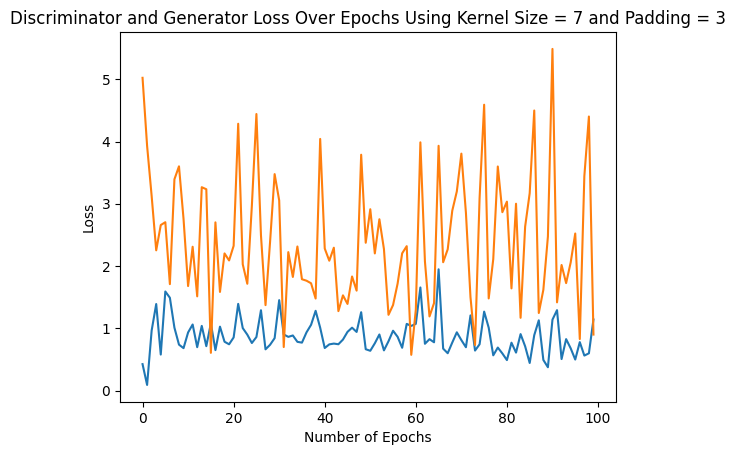

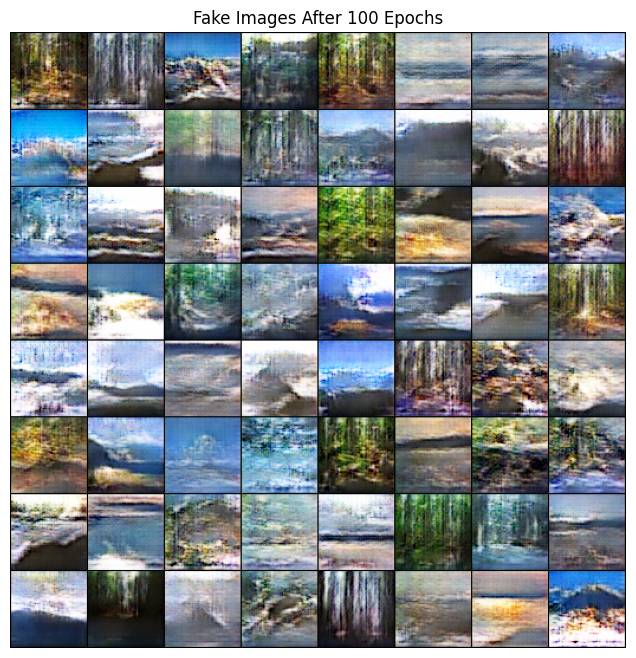

In [14]:
epoch_num = 100
lr = .00009
batch_size = 128
dLoss = []
gLoss = []
G = GeneratorGAN(kernSize = 7, padVal = 3)
G = G.to(device)   
G.apply(w_init)
D = DiscriminatorGAN(kernSize = 7, padVal = 3)
D = D.to(device)
D.apply(w_init)
optimD = optim.Adam(D.parameters(), lr = lr, betas = (0.5, .999))
optimG = optim.Adam(G.parameters(), lr = lr, betas = (0.5, .999))   
trainProcess(epoch_num, train_loader, D, G, optimD, optimG, dLoss, gLoss, lr, 7, 3, device)
trainResults(epoch_num, G, dLoss, gLoss, device)

### Testing

#### 200 Epochs, KernelSize 5, Padding 2

Text(50.722222222222214, 0.5, 'Predicted')

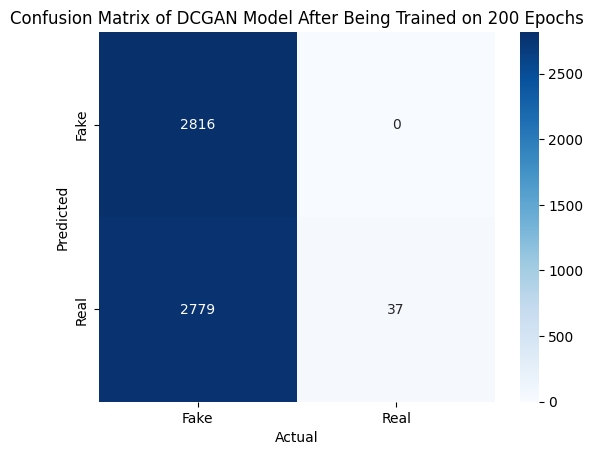

In [73]:
fakeResults, realResults = testResults(test_loader, 200, .00009, 5, 2)
testPlotting(fakeResults, realResults)

#### 300 Epochs, KernelSize 5, Padding 2

In [68]:
fakeResults, realResults = testResults(test_loader, 300, .00009, 5, 2)
testPlotting(fakeResults, realResults)

![img](images/300epochsconfmtx.png)